In [1]:
import wordgraph as wg

In [2]:
from ggplot import *

In [3]:
%reload_ext autoreload
%autoreload 2

# Make an empty WordGraph object

In [4]:
G = wg.WordGraph()

## Load some words

pass path to csv file with words in it, specifying which column to pull the words from

In [5]:
G.load_csv_words('some_words.csv', column='word')

In [6]:
G.words

array(['aardvark', 'abacus', 'abbey', ..., 'zoology', 'zoot-suit',
       'zucchini'], dtype=object)

In [7]:
len(G.words)

4401

## Generate the semantic graph given a similarity function and threshold

In [8]:
# load the vectors and vocab lookup dictionary
G.load_vector_model(vectors_path='vectors_glove_42b_300.npy', vocab_path='dict_glove_42b_300')

G.generate(simil_func='cos', epsilon=0.5)

### get the neighbor distribution for all the words

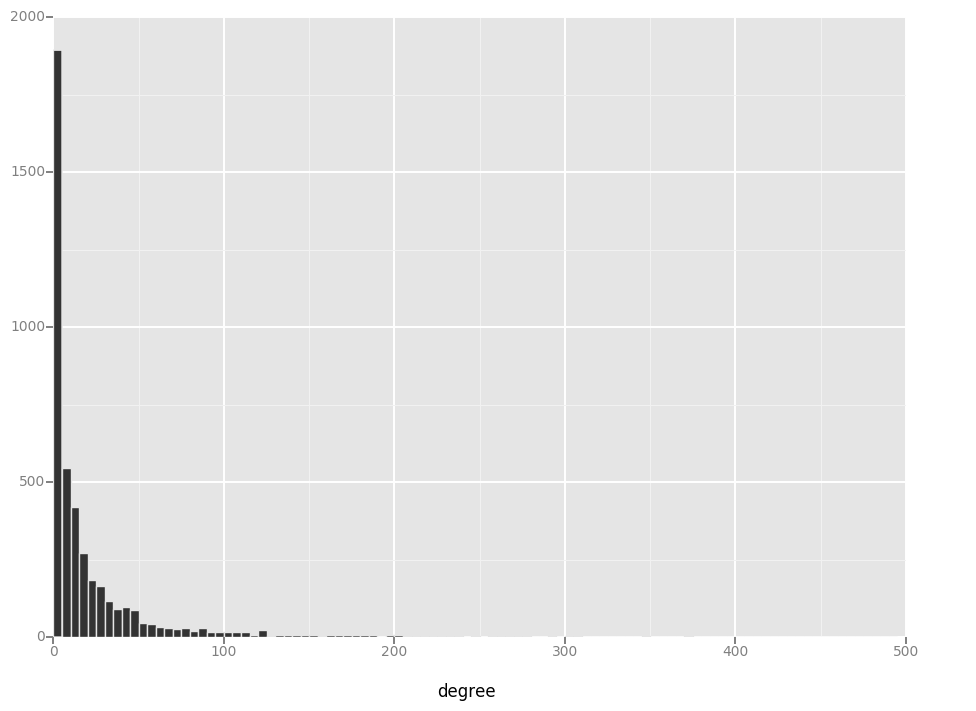

<ggplot: (269903245)>

In [23]:
degree_dist = G.degree_ditribution()

ggplot(degree_dist, aes(x='degree')) + geom_histogram(binwidth=5)

### Show top N nodes ranked by degree

In [10]:
G.top_degree(n=10)

,word,degree
120,one,494
186,well,472
117,need,425
37,can,419
187,will,406
185,way,402
144,put,392
113,might,374
74,fact,372
125,particular,366


### Fit a powerlaw function to the degree distribution

In [66]:
%%capture
pl_fit = G.fit_power_law(sigma_threshold=0.08, xmin=1)

In [67]:
print("alpha: {}".format(pl_fit.alpha))
print("sigma: {}".format(pl_fit.sigma))

alpha: 1.408687531451372
sigma: 0.007014092659508828
